<a href="https://colab.research.google.com/github/shonenkov/asr-shad/blob/jupyters%2Feda/Zakharov_Yaroslav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Зависимости

In [2]:
!git clone https://github.com/shonenkov/asr-shad > /dev/null
!pip install -r './asr-shad/requirements.txt' > /dev/null

fatal: destination path 'asr-shad' already exists and is not an empty directory.


In [3]:
import sys
sys.path.insert(0, './asr-shad/utils')
from audio_stats import get_audio_stats

# Исходные данные:

https://drive.google.com/drive/folders/1mNGJOSyNKs9j7ZRuI80u9XAttRY3KXos

Необходимо добавить ярлык датасета к себе на диск, затем mount:


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls 'drive/My Drive/numbers/numbers'

test-example  test-example.csv	train  train.csv


In [ ]:
INPUT_DIR = "/content/drive/My Drive/Sirius project. Numbers"
!ls "{INPUT_DIR}/numbers"

test-example  test-example.csv	train  train.csv


# EDA

In [6]:
train_csv = 'drive/My Drive/numbers/numbers/train.csv'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
train  = pd.read_csv(train_csv)
train.head(2)

,path,gender,number
0,train/e332b996d3.wav,female,157105
1,train/e25afda49a.wav,female,374554


In [7]:
#числа не повторяются , значит девушка и парень произносят разные числа
np.max(train['number'].value_counts())

1

In [8]:
sys.path.insert(0, '../utils')
from audio_stats import get_audio_stats, get_audio_meta

In [ ]:
audio_stats = get_audio_stats('drive/My Drive/numbers/numbers/train')
audio_stats.head()

In [ ]:
len(audio_stats)

9020

In [ ]:
stats = audio_stats.copy()
stats['filename'] = 'train/' + stats['filename']
stats.head(2)

,filename,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate
0,train/d56ee4cb49.wav,1,64326,24000,128696,2.680250,16
1,train/9ddedee2aa.wav,1,83099,24000,166242,3.462458,16


In [ ]:
stats = stats.rename(columns={"filename": "path"})
stats.head(2)

,path,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate
0,train/d56ee4cb49.wav,1,64326,24000,128696,2.680250,16
1,train/9ddedee2aa.wav,1,83099,24000,166242,3.462458,16


In [ ]:
res = pd.merge(stats, train, on='path', how='outer', indicator=True)
res[res['_merge']!='both'].head()

,path,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate,gender,number,_merge
75,train/992e0e5ff5 (1).wav,1,83055,24000,166154,3.460625,16,NaN,NaN,left_only
374,train/2bdb5dcc30 (1).wav,1,73077,24000,146198,3.044875,16,NaN,NaN,left_only
773,train/7b7d0cbdea (1).wav,1,67298,24000,134640,2.804083,16,NaN,NaN,left_only
2691,train/59b8d39784 (1).wav,1,88865,24000,177774,3.702708,16,NaN,NaN,left_only
3053,train/0ab62c4d60 (1).wav,1,82179,24000,164402,3.424125,16,NaN,NaN,left_only


In [ ]:
#есть файлы с именами без единицы
res[res['path']=='train/992e0e5ff5.wav']

,path,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate,gender,number,_merge
79,train/992e0e5ff5.wav,1,83055,24000,166154,3.460625,16,male,782856.0,both


In [ ]:
res['channels'].value_counts() ,res['bitrate'].value_counts(), res['sample_rate_hz'].value_counts()

(1    9020
 Name: channels, dtype: int64, 16    9020
 Name: bitrate, dtype: int64, 24000    9020
 Name: sample_rate_hz, dtype: int64)

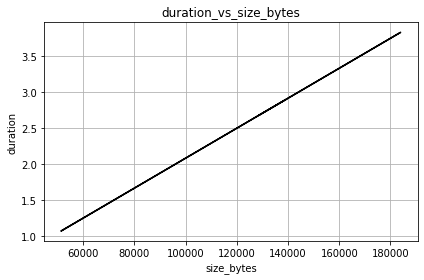

In [ ]:
plt.plot(res["size_bytes"], res['duration_s'], label="number_vs_duration", color="black")
plt.title("duration_vs_size_bytes")
plt.grid()
plt.xlabel("size_bytes")
plt.ylabel("duration")
plt.tight_layout()
plt.show()

In [ ]:
#чистим данные
index_of_copies =  res[res['_merge']!='both'].index.values.astype(int)
res =res.drop(index_of_copies)
res = res.drop(columns=['_merge','channels','bitrate','sample_rate_hz','size_bytes' ])
res

,path,frames,duration_s,gender,number
0,train/d56ee4cb49.wav,64326,2.680250,female,732115.0
1,train/9ddedee2aa.wav,83099,3.462458,male,781254.0
2,train/37f345b989.wav,85962,3.581750,female,871994.0
3,train/23367fea22.wav,69294,2.887250,male,915672.0
4,train/5e08e576be.wav,62958,2.623250,female,980032.0
...,...,...,...,...,...
9015,train/b90381298e.wav,58417,2.434042,female,25532.0
9016,train/769ca2032a.wav,43592,1.816333,male,840001.0
9017,train/b4c275ce77.wav,60220,2.509167,female,939105.0
9018,train/c6e4692c5d.wav,71620,2.984167,female,726752.0


In [ ]:

sys.path.insert(0, './asr-shad/')
from utils.text_stats import *

In [ ]:
def num_of_letters(num):
  return len(num2text(num)) - len(num2text(num).split(' '))+1

In [ ]:
d = {'number': [i for i in res['number']], 
     'num_of_words': [len(num2text(i).split(' ')) for i in res['number']],
     'num_of_letters':[num_of_letters(i) for i in res['number']] ,
     'num_of_digits': [len(str(int(i))) for i in res['number']] }
text_stats = pd.DataFrame(data=d )
text_stats.head(2)

,number,num_of_words,num_of_letters,num_of_digits
0,732115.0,6,37,6
1,781254.0,7,49,6


In [ ]:
total = pd.merge(res, text_stats, on='number', how='outer', indicator=True)
total[total['_merge']!='both'].head()

,path,frames,duration_s,gender,number,num_of_words,num_of_letters,num_of_digits,_merge


In [ ]:
total.head()

,path,frames,duration_s,gender,number,num_of_words,num_of_letters,num_of_digits,_merge
0,train/d56ee4cb49.wav,64326,2.680250,female,732115.0,6,37,6,both
1,train/9ddedee2aa.wav,83099,3.462458,male,781254.0,7,49,6,both
2,train/37f345b989.wav,85962,3.581750,female,871994.0,7,52,6,both
3,train/23367fea22.wav,69294,2.887250,male,915672.0,6,44,6,both
4,train/5e08e576be.wav,62958,2.623250,female,980032.0,5,36,6,both


In [ ]:
plt.scatter()

In [ ]:
l     = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900]
slogi = {0:1,1:2, 2:1,3:1, 4:3, 5:1, 6:1,  7:1, 8:2,
         9:2,10:2,11:4,12:3,13:3,14:4,15:3,16:3,17:3,18:4,19:4,20:2,30:2,40:2,50:3,60:3,70:3,80:4,90:4,100:1,200:2,300:2,400:4,500:2,600:2,700:2,800:3,900:3}

In [ ]:
import torch
import torchaudio
from torch.utils.data import Dataset, DataLoader
from utils.sound_dataset import SoundDataset
from utils.torchaudio_methods import draw_waveform, draw_spectrogram

In [ ]:
total.describe()

,frames,duration_s,number,num_of_words,num_of_letters,num_of_digits
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,70670.257222,2.944594,498985.033889,6.216667,41.452222,5.888889
std,8559.040935,0.356627,287934.540294,0.799037,6.239038,0.355436
min,25689.000000,1.070375,14.000000,1.000000,12.000000,2.000000
25%,65448.750000,2.727031,250111.500000,6.000000,37.000000,6.000000
50%,71517.000000,2.979875,494929.000000,6.000000,42.000000,6.000000
75%,76847.750000,3.201990,746297.500000,7.000000,46.000000,6.000000
max,91956.000000,3.831500,999888.000000,7.000000,56.000000,6.000000


In [ ]:
#у нас очень много длинныйх чисел
total['num_of_words'].value_counts()

7    3750
6    3721
5    1288
4     217
3      20
2       2
1       2
Name: num_of_words, dtype: int64

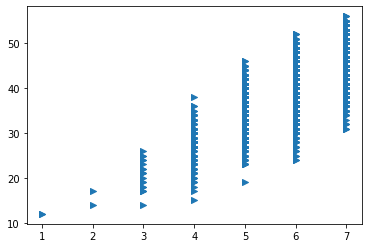

In [ ]:
plt.scatter(total['num_of_words'],total['num_of_letters'],  marker=">")
plt.show()

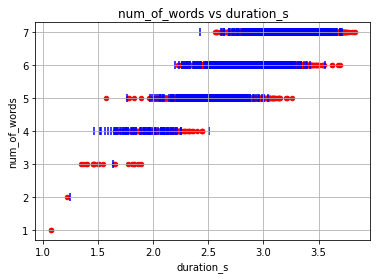

In [ ]:
total_fem = total.where(total['gender']== 'female').dropna()
total_mel = total.where(total['gender']== 'male').dropna()
plt.scatter(total_fem['duration_s'],total_fem['num_of_words'] , s=80,  marker=".", color ='red')
plt.scatter(total_mel['duration_s'],total_mel['num_of_words'] , s=80,  marker="|", color ='blue')
plt.title("num_of_words" + " vs "+ "duration_s")
plt.xlabel("duration_s")
plt.ylabel("num_of_words")
plt.grid()
plt.show()


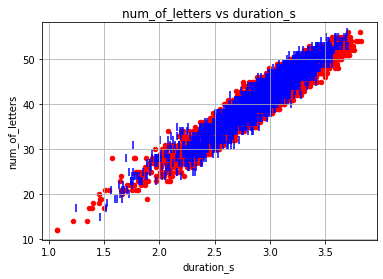

In [ ]:
total_fem = total.where(total['gender']== 'female').dropna()
total_mel = total.where(total['gender']== 'male').dropna()
plt.scatter(total_fem['duration_s'],total_fem['num_of_letters'] , s=80,  marker=".", color ='red')
plt.scatter(total_mel['duration_s'],total_mel['num_of_letters'] , s=80,  marker="|", color ='blue')
plt.title("num_of_letters" + " vs "+ "duration_s")
plt.xlabel("duration_s")
plt.ylabel('num_of_letters')
plt.grid()
plt.show()

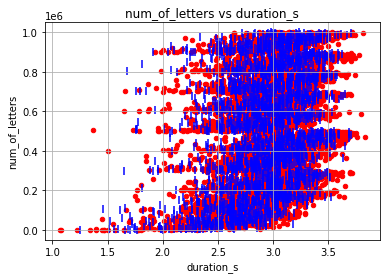

In [ ]:
total_fem = total.where(total['gender']== 'female').dropna()
total_mel = total.where(total['gender']== 'male').dropna()
plt.scatter(total_fem['duration_s'],total_fem['number'] , s=80,  marker=".", color ='red')
plt.scatter(total_mel['duration_s'],total_mel['number'] , s=80,  marker="|", color ='blue')
plt.title("num_of_letters" + " vs "+ "duration_s")
plt.xlabel("duration_s")
plt.ylabel('num_of_letters')
plt.grid()
plt.show()

In [ ]:
total.where(total['num_of_words']<3).dropna()

,path,frames,duration_s,gender,number,num_of_words,num_of_letters,num_of_digits,_merge
2968,train/c7d2263e89.wav,29278.0,1.219917,female,61.0,2.0,14.0,2.0,both
6127,train/ee643401ea.wav,25807.0,1.075292,female,14.0,1.0,12.0,2.0,both
7331,train/d8fc26da73.wav,29918.0,1.246583,male,670.0,2.0,17.0,3.0,both
7715,train/1339fd4329.wav,25689.0,1.070375,female,19.0,1.0,12.0,2.0,both


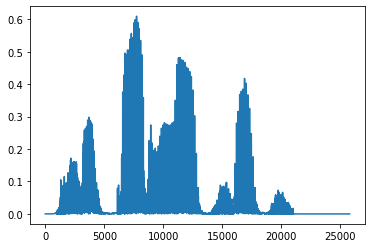

In [ ]:
waveform , sample_rate = torchaudio.load(INPUT_DIR+"/numbers/" +"train/ee643401ea.wav" )
draw_waveform(np.abs(waveform))

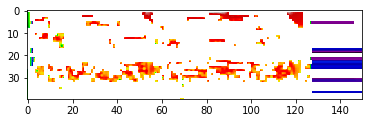

In [ ]:
draw_spectrogram(waveform, kind='mfcc', output_file='spectrogram')

In [ ]:
np.max(np.abs(waveform)[0].numpy())

0.60943604

In [ ]:
u_set = SoundDataset(train_csv , INPUT_DIR+"/numbers" )


In [ ]:
len(u_set)

9000

In [ ]:
max = []
avg = []
std = []
paths = []
for i in range(len(u_set)):
  max.append(np.max(np.abs(u_set[i]['waveform'][0].numpy())))
  avg.append(np.mean(np.abs(u_set[i]['waveform'][0].numpy())))
  std.append(np.std(np.abs(u_set[i]['waveform'][0].numpy())))
  paths.append(u_set[i]['path'])

In [ ]:
d_1 = {'max': max, 
     'avg': avg,
     'std': std ,
     'path': paths }
waveform_stats = pd.DataFrame(data=d_1 )
waveform_stats.describe()

,max,avg,std
count,9000.000000,9000.000000,9000.000000
mean,0.574073,0.058726,0.074790
std,0.067090,0.004010,0.005286
min,0.398804,0.044903,0.060488
25%,0.520752,0.055961,0.070760
50%,0.571136,0.058677,0.074942
75%,0.618324,0.061363,0.078550
max,0.764709,0.074924,0.093866


# Мой вклад

# Краткое описание моей модели ASR для поставленной задачи